**Цель работы:**

Изучение связи между признаками двумерного набора данных, визуализация данных.

# Исследовательский анализ данных

### Описание предметной области

Вариант № 14

Набор данных: auto2.csv

Данные о поддержанных авто:
1. имя
2. год
3. цена продажи
4. пройдено км
5. топливо
6. тип продавца
7. коробка передач
8. тип владельца

### 1. Чтение файла (набора данных)

In [2]:
# импорт библиотек, чтение файла с помощью pandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("auto2.csv")

### 2. Обзор данных

2.1. Вывод первых 20 строк с помощью метода head.

In [3]:
df.head(20)

,Name,year,SellingPrice,kmdriven,fuel,seller_Type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000.0,125000.0,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000.0,25000.0,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petroll,2014,240000.0,60000.0,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000.0,25000.0,Petroll,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000.0,78000.0,CNG,Individual,Manual,First Owner


2.2. Оценка данных с помощью метода info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4344 non-null   object 
 1   year          4344 non-null   int64  
 2   SellingPrice  4342 non-null   float64
 3   kmdriven      4343 non-null   float64
 4   fuel          4343 non-null   object 
 5   seller_Type   4344 non-null   object 
 6   transmission  4344 non-null   object 
 7   owner         4344 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.6+ KB


2.3. Оценка данных с помощью метода describe.

In [5]:
df.describe()

,year,SellingPrice,kmdriven
count,4344.000000,4.342000e+03,4343.000000
mean,2013.092311,5.039987e+05,66193.063320
std,4.214543,5.784465e+05,46636.648764
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


2.4. Корректировка названий столбцов.

In [6]:
df = df.rename(columns={
    "year": "Year",
    "kmdriven": "KmDriven",
    "seller_Type": "SellerType",
    "transmission": "Transmission",
    "fuel": "Fuel",
    "owner": "Owner"
})

2.5. Исправление дубликатов

In [7]:
print(df["SellerType"].unique())
df["SellerType"] = df["SellerType"].replace("Dealeer", "Dealer")
print(df["SellerType"].unique())

['Individual' 'Dealer' 'Dealeer' 'Trustmark Dealer']
['Individual' 'Dealer' 'Trustmark Dealer']


2.6. Удаление пустых строк

In [8]:
print(df.isna().sum())
df = df.dropna(subset=["SellingPrice"])
print(df.isna().sum())

Name            0
Year            0
SellingPrice    2
KmDriven        1
Fuel            1
SellerType      0
Transmission    0
Owner           0
dtype: int64
Name            0
Year            0
SellingPrice    0
KmDriven        0
Fuel            0
SellerType      0
Transmission    0
Owner           0
dtype: int64


**`Вывод: Как видно, таблица содержит в себе данные об автомобилях, такие как цена продажи, пробег и прочие тенхнические характеристики. Типы данных расставлены корректно, но названия столбцов изначально были написани в разных нотациях, а потому были переименованы в одном стиле. Пустые строки не содержат цену продажи, а потому не имеют смысла и должны быть удалены. Неявные дубликаты также были исправлены.`**

### 3. Построение диаграммы рассеяния

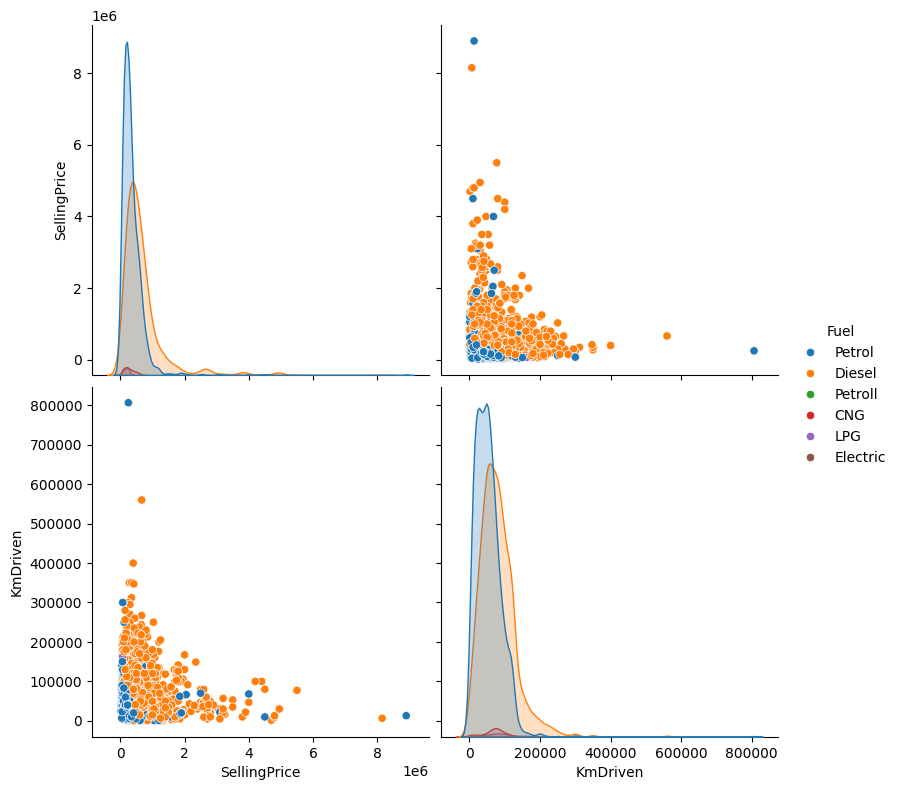

In [9]:
# Матрица диаграмм рассеяния
sns.pairplot(
    df[["SellingPrice", "KmDriven", "Fuel"]], # Искомые данные
    hue="Fuel", # Рассчётное поле
    height=4 # Высота грани
)

**`Вывод: Матрица диаграмм рассеяния построена по параметрам цены автомобиля, пройденного им расстояния и сгруппирована по типам используемого топлива. Можно увидеть, что во всех графиках практически все значения стремятся к цене от 0 до 2 млн., а пройденное расстояние - от 0 до 300 тыс. Аномально большие значения встречаются, но их крайне мало.`**

### 4. Построение гистограмм

<Axes: title={'center': 'Количество автомобилей по цене'}, xlabel='Цена продажи', ylabel='Количество'>

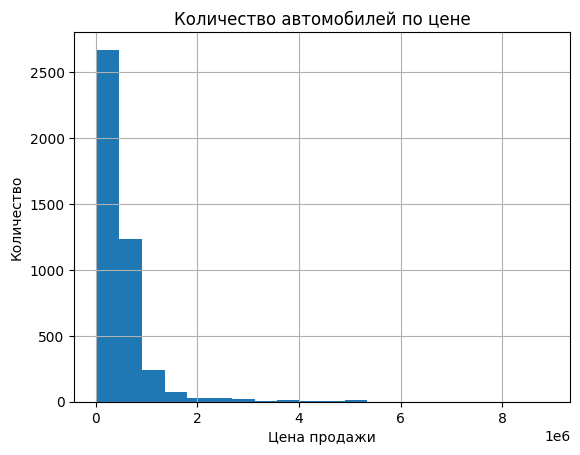

In [10]:
# Гистограмма по столбцу "Цена продажи"
fig, ax = plt.subplots() # Инициализация графика
ax.set_title("Количество автомобилей по цене") # Изменение названия
ax.set_xlabel("Цена продажи") # Изменение названия оси Х
ax.set_ylabel("Количество") # Изменение названия оси Y

df["SellingPrice"].hist(bins=20, ax=ax) # Вывод графика по указанным настройкам

<Axes: title={'center': 'Количество автомобилей по пройденной дистанции'}, xlabel='Расстояние', ylabel='Количество'>

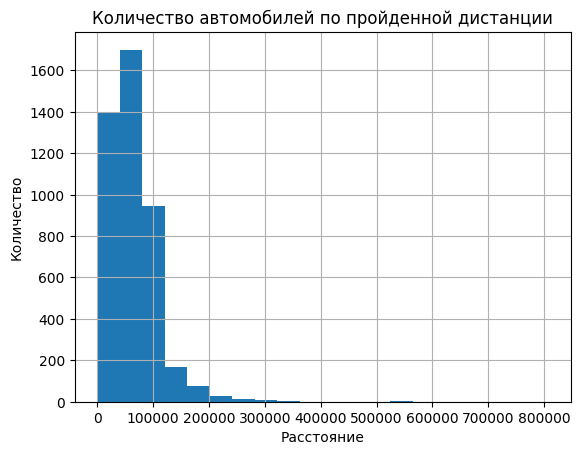

In [11]:
# Гистограмма по столбцу "Пройдено км"
fig, ax = plt.subplots()
ax.set_title("Количество автомобилей по пройденной дистанции")
ax.set_xlabel("Расстояние")
ax.set_ylabel("Количество")

df["KmDriven"].hist(bins=20, ax=ax)

**`Вывод: Числовыми полями в данном файле с данными являются поля цены продажи и пройденного автомобилем расстояния. На гистограммах видно, что больше половины автомобилей имеет пробег не более 100 тыс. км, а цена более чем 2/3 всех автомобилей не превышает 1 млн. Было принято решение делить гистограмму на 20 столбцов, так как именно в этом случае лучше всего демонстрируюстя различия величин того или иного графика.`**

### 5. Оценка коэффициента корреляции и ковариации

5.1 Оценка корелляции цены к остальным полям

,Year,SellingPrice,KmDriven
Year,1.000000,0.413701,-0.419790
SellingPrice,0.413701,1.000000,-0.192139
KmDriven,-0.419790,-0.192139,1.000000


<Axes: >

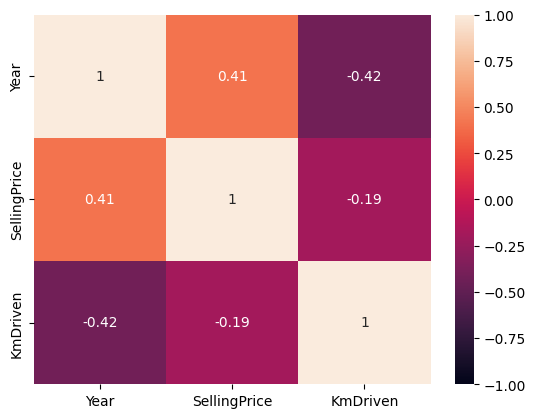

In [12]:
# Расчёт корреляции
corr = df.corr(numeric_only=True)
display(corr)
sns.heatmap(corr, annot=True, vmax=1, vmin=-1) # Вывод тепловой карты корреляции

5.2. Оценка ковариации

In [13]:
# Расчёт ковариации
cov = df.cov(numeric_only=True)
display(cov)

,Year,SellingPrice,KmDriven
Year,1.776484e+01,1.008626e+06,-8.251658e+04
SellingPrice,1.008626e+06,3.346003e+11,-5.183319e+09
KmDriven,-8.251658e+04,-5.183319e+09,2.174986e+09


**`Вывод: Корреляция и ковариация показывают, насколько две переменные изменяются вместе. Разница между ними в том, что ковариация показывает только зависимость между двумя переменными, а корреляция показывает силу и направление этой зависимости. Положительное число означает, что две переменные изменяются в одну сторону, отрицательное говорит об обратном. В данном случае видно, что рост цены автомобиля коррелирует с годом выпуска, а при повышении пробега цена падает. При этом знаки перед числами у коэффициентов корреляции и ковариации совпадает, что говорит об их корректности.`**

### 6. Построение графика по варианту

**Задание 1. Использовать seaborn.** По группировке - fuel и количество машин каждого типа коробки передач (transmission) построить диаграмму.

<Axes: xlabel='Fuel', ylabel='Count'>

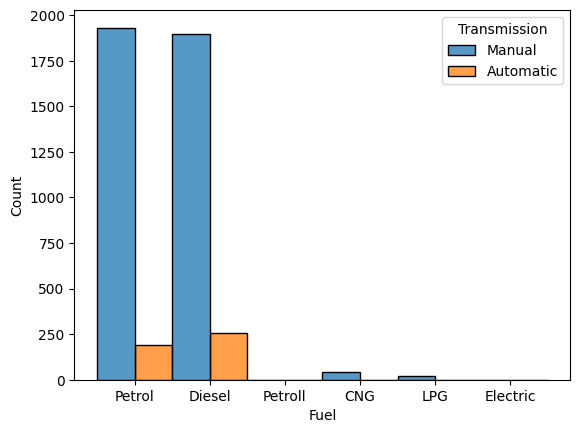

In [14]:
# Гистограмма по полям Fuel и Transmission
sns.histplot(
    df, # Основные данные
    x="Fuel", # Ось Х, ось Y по умолчанию станет количеством
    hue="Transmission", # Тип данных, по которым ведётся сводка
    multiple="dodge" # Изменение наложения графиков
)

**`Вывод: Для создания диаграммы использовался метод histplot, в который был передан объект DataFrame. Параметр x выбирает столбец для оси x, параметр hue является исследуемым полем, а параметр multiple=dodge выбирает способ отображения нескольких диаграмм на одном графике. По результатам можно сделать вывод, что преимущественным большинством являются автомобили с ручной коробкой передачи, работающие на бензине или дизельном топливе.`**

**Задание 2. Использовать pandas и plot.** По сводной таблице (pivot_table) - отобразить среднее количество пройденных километров (KmDriven) по типу продавца. Оставить только маркеры в виде × красного цвета размером 14.

<Axes: title={'center': 'Среднее количество пройденных километров по типу продавца'}, xlabel='Тип продавца', ylabel='Расстояние'>

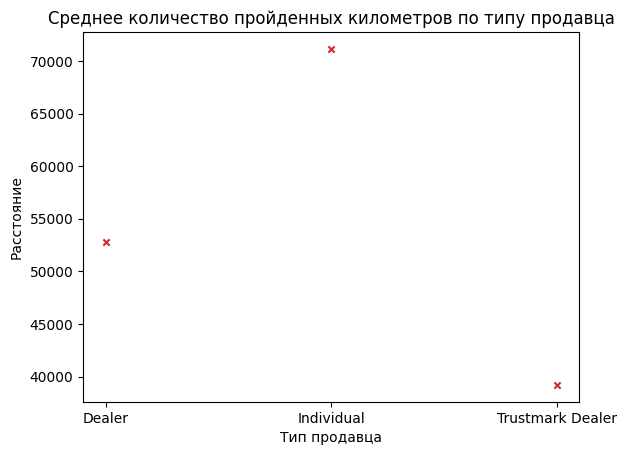

In [15]:
# Диаграмма рассеяния по сводной таблице
pivot = df.pivot_table(index="SellerType", values="KmDriven").reset_index() # Создание сводной таблицы
pivot.plot(
    kind="scatter",
    x="SellerType",
    y="KmDriven",
    marker="x",
    color="tab:red",
    title="Среднее количество пройденных километров по типу продавца",
    xlabel="Тип продавца",
    ylabel="Расстояние"
)

**`Вывод: Для создания диаграммы используется метод scatter, принимающий поля сводной таблицы. Изменение маркера происходит при помощи параметра markers, изменение цвета - при помощи параметра c, а размер задаётся параметром s. В диаграмме можно увидеть, что собственники имеют больший средний пробег из всех, равный 70 тыс.. Дилеры находятся на втором месте, а проверенные дилеры имеют меньший средний пробег.`**

**Задание 3. Использовать matplotlib.** Отфильтровать данные и выбрать год выпуска старше 2000 Построить круговую диаграмму, которая отображает процент каждого типа владельца (owner).

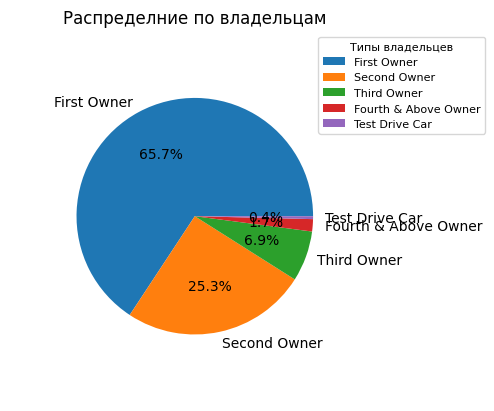

In [15]:
# Круговая диаграмма по фильтрованным данным
filtered_df = df[df["Year"] > 2000] # Фильтрация данных
counts = filtered_df["Owner"].value_counts() # Подсчёт частоты различных типов
plt.pie(
    counts, # Основные данные посчёта
    labels=counts.index, # Название каждой категории типом продавца
    autopct='%1.1f%%', # Формат вывода процентов
    radius=0.8 # Размер
)
plt.title("Распределние по владельцам") # Добавление заголовка
plt.legend(
    counts.index, # Создание легенды
    title='Типы владельцев', # Заголовок легенды
    bbox_to_anchor=(0.8, 0.5, 0.5, 0.5), # Расположение легенды
    fontsize=8, title_fontsize=8 # Размер шрифта
)

**`Вывод: Круговая диаграмма создаётся при помощи метода pie на основе подсчёта частоты различных типов владельцев. После настроек диаграммы при помощи метода legend добавляется легенда, дополнительно поясняющая каждый цвет. По диаграмме видно, что больше половины продавцов являются первыми владельцами своего автомобиля. С каждым последующим разрядом данный показатель уменьшается.`**

### 7. Построение графика типа Hexagonal binning plot

<Axes: xlabel='Year', ylabel='KmDriven'>

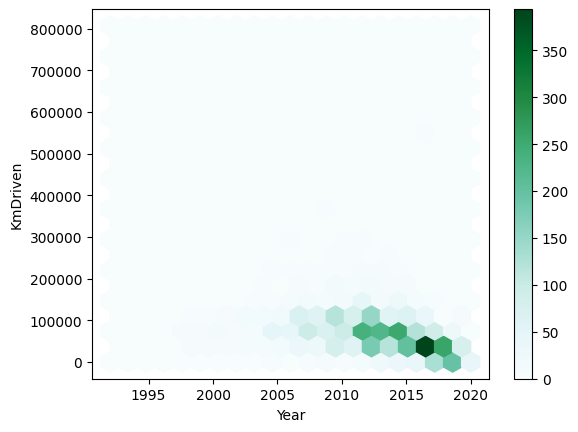

In [16]:
# Hexagonal binning plot
df.plot(
    x="Year",
    y="KmDriven",
    kind="hexbin",
    gridsize=20
)

**`Вывод: Для создания подобной диаграммы требуется указать параметр kind=hexbin. В таком случае график делится на шестиугольные области, чем больше точек попадёт в область, тем более тёмной она станет. На данном графике видно, что преимущественное количество машин выпускалось примерно в 2017 году и имеет пробег примерно 60 тыс.`**

### 8. Построение графика Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x16c975ec050>,
 'caps': [<matplotlib.lines.Line2D at 0x16c975ec2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c975abed0>],
 'medians': [<matplotlib.lines.Line2D at 0x16c95ba7890>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c975ec550>],
 'means': []}

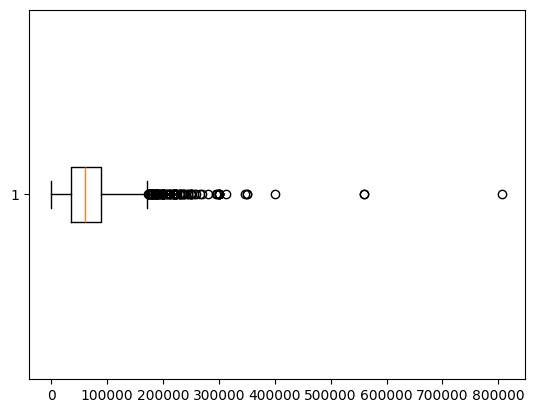

In [17]:
# Диаграмма разброса (Boxplot)
plt.boxplot(df["KmDriven"], vert=False)

**`Вывод: Диаграмма размаха показывает распределение набора данных на основе сводки из пяти ключевых чисел: минимума, первого квартиля (Q1), медианы (Q2), третьего квартиля (Q3) и максимума. Границы "ящика" являются границами первого и третьего квартиля, а границы усов - минимумом и максимумом. В данном случае видно, что вплоть до значения 800 тыс. находятся выброс, т.е. нетипичное наблюдение.`**

### 9. Создание Boxplot по категориям

9.1. Создание категорий

In [17]:
# Категоризация
df["PriceCategory"] = pd.cut(df["SellingPrice"], bins=3, labels=["Low", "Medium", "High"])

9.2. Создание диаграммы по категориям

{'whiskers': [<matplotlib.lines.Line2D at 0x19157846c10>,
 'caps': [<matplotlib.lines.Line2D at 0x19157846e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x19157846ad0>,
 'medians': [<matplotlib.lines.Line2D at 0x19157847110>,
 'fliers': [<matplotlib.lines.Line2D at 0x19157847250>,
 'means': []}

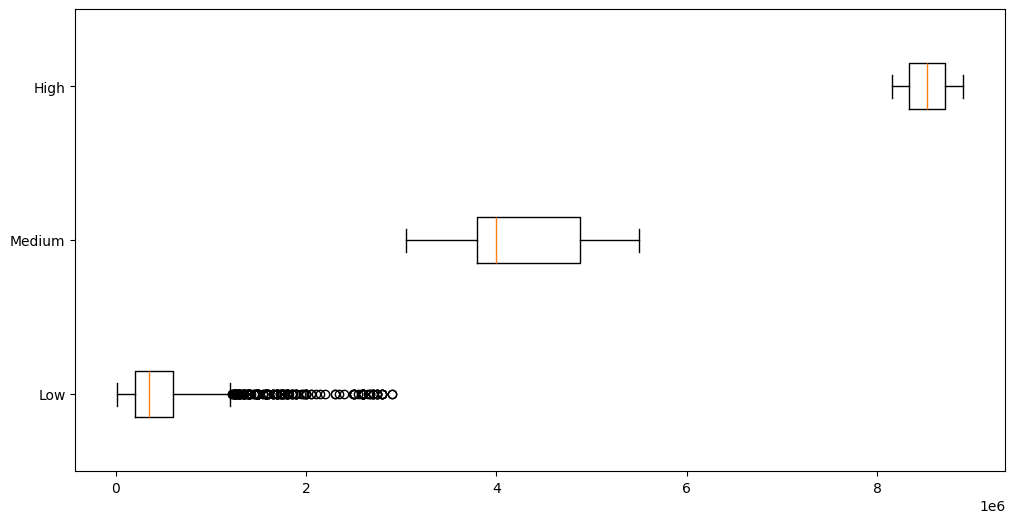

In [20]:
# Создание диаграммы по категориям
fig, axes = plt.subplots(figsize=(12, 6))
df_low = df[df["PriceCategory"] == "Low"]
df_medium = df[df["PriceCategory"] == "Medium"]
df_high = df[df["PriceCategory"] == "High"]

axes.boxplot(
    [df_low["SellingPrice"], df_medium["SellingPrice"], df_high["SellingPrice"]],
    vert=False, tick_labels=["Low", "Medium", "High"]
)

**`Вывод: Категории были созданы при помощи метода cut. Для анализа был выбрал столбец с ценой автомобилей, который был разделён на низкую, среднюю и высокую категории. На первом графике пиковый выброс виден на значении в 300 тыс. На втором графике нет выбросов, а потому их можно оценивать лишь по квартилям и медианам.`**

### 10. Создание Boxplot посредством разных библиотек

In [22]:
# Категоризация
df["YearCategory"] = pd.cut(df["Year"], bins=3, labels=["Old", "Medium", "New"])
df["MileageCategory"] = pd.cut(df["KmDriven"], bins=3, labels=["Little", "Medium", "Much"])

<Axes: xlabel='YearCategory', ylabel='SellingPrice'>

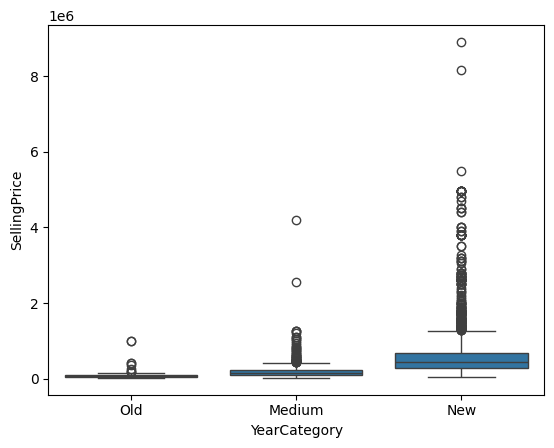

In [23]:
# Диаграмма рассеяния по полям YearCategory и SellingPrice (seaborn)
sns.boxplot(df, x="YearCategory", y="SellingPrice")

<Axes: title={'center': 'SellingPrice'}, xlabel='MileageCategory'>

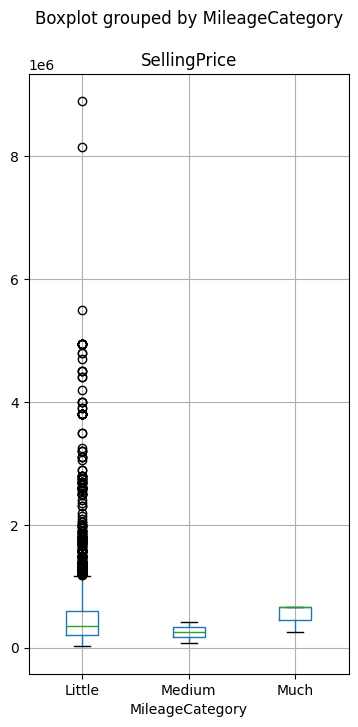

In [24]:
# Диаграмма рассеяния по полям MileageCategory и SellingPrice (pandas)
df.boxplot(by="MileageCategory", column="SellingPrice", figsize=(4, 8))

**`Вывод: Для отображения были созданы категории по году выпуска (старый, умеренный, новый) и пробегу (маленький, умеренный и большой). По первой диаграмме, созданной на основе категорий года выпуска, видно, что цена продажи автомобиля увеличивается пропорционально году выпуска, новые машины стоят дороже. Во втором графике, основанному на категориях пробега, можно увидеть, что пробег не сильно влияет на цену. Так. например, машины из высокой категории стоят выше средней категории, но максимум высокой категории меньше, чем максимум низкой категории. Это может быть связано с количеством машин, продаваемых в низкой категории.`**

### Вывод

В ходе выполнения лабораторной работы были рассмотрены различные методы визуализации данных (диаграмма рассеяния, круговая диаграмма, гистограмма и пр.). Обработке подвергался файл, содержащий данные об автомобилях, такие как пробег, год выпуска, стоимость и др. В ходе анализа данных были выявлены логические закономерности, например, цена автомобиля увеличивается, если он был выпущен в поздние года, или то, что автомобили на бензине и дизельном топливе являются самыми многочисленными. При этом разные графики подходят для разных сводок. Так, гистограммы позволяют удобно сравнивать показатели по категориям (например, количество машин по типу топлива); диаграмма рассеяния позволяет увидеть количественный разбор наглядно, а круговая диаграмма - посмотреть, какую долю составляет та или иная категория машин. Для написания кода использовались библиотеки pandas, matplotlib и seaborn, предоставляющие большой и удобный функционал для вывода диаграмм и их точной настройки.